# Análise Exploratória e Preparação dos Dados - ENEM 2023

 Este notebook tem como objetivo realizar uma análise exploratória dos dados do ENEM 2023 e preparar os dados para a modelagem preditiva.

# Pré-processamento dos Dados

 1. Análise de valores nulos e investigação de padrões.
 2. Exploração de perfis de candidatos que se abstiveram.
 3. Criação da variável target (NOTA_ENEM) como média das cinco áreas avaliadas.
 4. Remoção de colunas irrelevantes e com alta porcentagem de valores ausentes.

# Análise Exploratória (EDA)

 1. **Análise de Abstenção**
 2. **Análise Univariada**
 3. **Análise Bivariada**

# Dataset Final

 Criação do dataset final para modelagem contendo informações de candidatos que realizaram todas as provas, totalizando **2.6 milhões de registros**.

 > **Nota**: O dicionário das colunas do dataset está na pasta 'data' com nome 'Dicionário_Microdados_Enem_2023.xlsx'

# 1. Importação de Bibliotecas e dos dados

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from codigos_auxiliares import * # Funções auxiliares para plotagem de gráficos

In [ ]:
# Importação dos Dados -> Necessario a utilização de um encoding específico para evitar problemas com caracteres especiais.
df_enem_raw=pd.read_csv('DADOS/MICRODADOS_ENEM_2023.csv',sep=';',encoding='latin1')
df_enem_raw.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


# 2. Análise Inicial dos Dados

 Primeiro vamos analisar as informações contidas no DataFrame: dimensões, tipos de dados, valores nulos e estrutura geral.

 Esta análise nos ajudará a entender melhor o conjunto de dados e planejar as etapas de limpeza e pré-processamento.

In [ ]:
# Exibição das Dimensões do DataFrame
print(f'Quantidade de Linhas:{df_enem_raw.shape[0]}\nQuantidade de Colunas:{df_enem_raw.shape[1]}')

Quantidade de Linhas:3933955
Quantidade de Colunas:76


In [ ]:
# Visão geral do dataset
df_enem_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933955 entries, 0 to 3933954
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

 Observamos que o dataset possui 3.933.955 registros e 76 colunas, além de um uso de memoria de 2.2 GB.

In [ ]:
# Verificando duplicadas
df_enem_raw.duplicated().sum()

0

 Sem linhas duplicadas.

In [ ]:
# Verificando as colunas
df_enem_raw.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

# 2.1 Podemos fazer uma análise dos valores nulos e tentar entender o por que de sua existência:

In [ ]:
# Verificando a quantidade de valores nulos em cada coluna
pd.set_option('display.max_rows', None)  # aumenta o limite de linhas exibidas, para ter uma visão melhor.
df_enem_raw.isnull().mean().sort_values(ascending=False).reset_index()

,index,0
0,TP_LOCALIZACAO_ESC,0.756351
1,CO_UF_ESC,0.756351
2,TP_SIT_FUNC_ESC,0.756351
3,TP_DEPENDENCIA_ADM_ESC,0.756351
4,SG_UF_ESC,0.756351
5,CO_MUNICIPIO_ESC,0.756351
6,NO_MUNICIPIO_ESC,0.756351
7,TP_ENSINO,0.659609
8,NU_NOTA_CN,0.315593
9,CO_PROVA_MT,0.315593


In [ ]:
pd.reset_option('display.max_rows') # Resetando a configuração do limite de linhas exibidas.

# 2.1.1 Para a coluna 'TP_ENSINO':

In [ ]:
# Analisando a relação entre valores nulos em TP_ENSINO e TP_ESCOLA
registros_tp_ensino_nulo = df_enem_raw[df_enem_raw['TP_ENSINO'].isnull()]
total_nulos_tp_ensino = registros_tp_ensino_nulo.shape[0]

In [ ]:
# Verificando quantos dos valores nulos em TP_ENSINO também não responderam TP_ESCOLA
nao_respondeu_tp_escola = registros_tp_ensino_nulo['TP_ESCOLA'].value_counts().iloc[0]
percentual_nao_respondeu = (nao_respondeu_tp_escola / total_nulos_tp_ensino) * 100

print(f"Análise da correlação entre TP_ENSINO e TP_ESCOLA:")
print(f"• {percentual_nao_respondeu:.4f}% dos valores nulos em TP_ENSINO correspondem a pessoas categorizadas como 'não responderam' (categoria 1) em TP_ESCOLA")

# Verificação inversa: das pessoas que não responderam TP_ESCOLA, quantas também têm valores nulos em TP_ENSINO
nao_respondeu_escola = df_enem_raw[df_enem_raw['TP_ESCOLA'] == 1]  # 1 = categoria "Não respondeu"
percentual_inverso = (nao_respondeu_escola['TP_ENSINO'].isnull().sum() / len(nao_respondeu_escola)) * 100
print(f"• {percentual_inverso:.4f}% das pessoas que marcaram 'não responderam' em TP_ESCOLA  têm valores nulos em TP_ENSINO")

Análise da correlação entre TP_ENSINO e TP_ESCOLA:
• 97.6076% dos valores nulos em TP_ENSINO correspondem a pessoas categorizadas como 'não responderam' (categoria 1) em TP_ESCOLA
• 99.9999% das pessoas que marcaram 'não responderam' em TP_ESCOLA  têm valores nulos em TP_ENSINO


# Interpretação dos Resultados

 Valores nulos em `TP_ENSINO` correlacionam com categoria "não responderam" em `TP_ESCOLA`, indicando a fonte dos dados faltantes.

# 2.1.2 Colunas referentes as provas:
 É bem provavel que exista uma explicação, ou padrão, para os valores nulos das colunas com final _CN e _MT referentes a Ciências da Natureza e Matemática.

 Tal qual para as colunas relacionadas a redação (COMP1~5) e as provas do segundo dia Linguagens e Códigos e Ciências Humanas (_LC e _CH).

 A hipotese é que seja devido a ausencia ou elimição no dia da aplicação da prova.

In [ ]:
presenca_ch_lc = df_enem_raw[(df_enem_raw['TP_PRESENCA_CH'] == 0) | (df_enem_raw['TP_PRESENCA_CH'] == 2)| (df_enem_raw['TP_PRESENCA_LC'] == 0) | (df_enem_raw['TP_PRESENCA_LC'] == 2)]
print(f'Pessoas marcadas como faltantes/Eliminadas no dia da prova de "Ciências Humanas" e "Linguagens e Códigos" representam {presenca_ch_lc.shape[0]/df_enem_raw.shape[0]:.4%} do dataset!')
mascara = presenca_ch_lc.isnull().mean().sort_values(ascending=False)
colunas_100 = mascara[mascara == 1]
colunas_100

Pessoas marcadas como faltantes/Eliminadas no dia da prova de "Ciências Humanas" e "Linguagens e Códigos" representam 28.2492% do dataset!


NU_NOTA_LC           1.0
NU_NOTA_COMP1        1.0
TX_RESPOSTAS_LC      1.0
TX_RESPOSTAS_CH      1.0
CO_PROVA_CH          1.0
CO_PROVA_LC          1.0
TX_GABARITO_CH       1.0
TP_STATUS_REDACAO    1.0
TX_GABARITO_LC       1.0
NU_NOTA_COMP2        1.0
NU_NOTA_COMP3        1.0
NU_NOTA_COMP4        1.0
NU_NOTA_COMP5        1.0
NU_NOTA_REDACAO      1.0
NU_NOTA_CH           1.0
dtype: float64

 A análise confirma nossa hipótese: candidatos ausentes/eliminados (28,24% do dataset) apresentam 100% de valores nulos nas colunas das provas correspondentes, validando que os dados faltantes seguem um padrão sistemático esperado: coluna zerada devido a falta/eliminação no dia.

In [ ]:
presenca_mt_cn = df_enem_raw[(df_enem_raw['TP_PRESENCA_MT'] == 0) | (df_enem_raw['TP_PRESENCA_MT'] == 2) | (df_enem_raw['TP_PRESENCA_CN'] == 0) | (df_enem_raw['TP_PRESENCA_CN']==2)]
print(f'Pessoas marcadas como faltantes/Eliminadas no dia da prova de "Matemática" e "Ciências da Natureza" representam {presenca_mt_cn.shape[0]/df_enem_raw.shape[0]:.4%} do dataset!')
mascara = presenca_mt_cn.isnull().mean().sort_values(ascending=False)
colunas_100 = mascara[mascara == 1]
colunas_100

Pessoas marcadas como faltantes/Eliminadas no dia da prova de "Matemática" e "Ciências da Natureza" representam 31.5593% do dataset!


TX_RESPOSTAS_MT    1.0
NU_NOTA_MT         1.0
NU_NOTA_CN         1.0
CO_PROVA_MT        1.0
CO_PROVA_CN        1.0
TX_RESPOSTAS_CN    1.0
TX_GABARITO_MT     1.0
TX_GABARITO_CN     1.0
dtype: float64

 O mesmo acontece para o dia de matemática e ciências da natureza.

# 2.2 Exclusão de colunas com percentual muito alto de nulos e que não vão agregar para a análise.
 Como temos colunas com uma quantidade muito alta de valores nulos, vamos excluir essas colunas.

 Além da adição, na lista de colunas a serem removidas, de colunas extras que não são relevantes para a análise/modelo.

 Threshold de 65%: acima deste valor, imputação introduziria mais viés do que informação útil

In [ ]:
colunas_removiveis=df_enem_raw.isna().mean().sort_values(ascending=False)>0.65
colunas_removiveis=colunas_removiveis[colunas_removiveis].index.tolist()
colunas_extras=[
    'NU_INSCRICAO', 'NU_ANO','TP_NACIONALIDADE',
    'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC','TP_ANO_CONCLUIU',
    'TX_GABARITO_CN', 'TX_GABARITO_CH','TX_GABARITO_LC', 'TX_GABARITO_MT','TX_RESPOSTAS_MT',
    'CO_PROVA_CN', 'CO_PROVA_CH','CO_PROVA_LC', 'CO_PROVA_MT','CO_UF_PROVA',
    'CO_MUNICIPIO_PROVA'
]
colunas_removiveis.extend(colunas_extras)
df_enem_raw.drop(columns=colunas_removiveis,axis=1,inplace=True)
print(df_enem_raw.columns)
print(f'Quantidade de Linhas: {df_enem_raw.shape[0]}\nQuantidade de Colunas: {df_enem_raw.shape[1]}')

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object')
Quantidade de Linhas: 3933955
Quantidade de Colunas: 50


# 3.0 Antes de partir para a criação da variavel target, podemos fazer uma analise entre pessoas que se abstiveram da prova e pessoas que fizeram, verificando como algumas informações podem ter influenciado na abstenção.

In [ ]:
df_abstencao=df_enem_raw.copy()
def definir_grupo(row):
    if (row['TP_PRESENCA_CH'] == 0) and (row['TP_PRESENCA_CN'] == 0):
        return "abstencao"
    elif (row['TP_PRESENCA_CH'] == 1) and (row['TP_PRESENCA_CN'] == 1):
        return "presente_dois_dias"
    else:
        return None  # descarta os casos intermediários

df_abstencao['GRUPO'] = df_abstencao.apply(definir_grupo, axis=1)
df_abstencao['GRUPO'].value_counts()

GRUPO
presente_dois_dias    2678264
abstencao             1093223
Name: count, dtype: int64

 Para minha análise, resolvi definir como "abstenção" apenas as pessoas que faltaram nos dois dias, e como "presente" apenas as pessoas que compareceram nos dois dias.

 Isso porque existem grupos intermediários (compareceu em um dia e faltou no outro, ou foi eliminado em um dia mas compareceu no outro).

In [ ]:
#Mudando a categoria de diferentes colunas.
mapa_grupos_idade = {
    1: "Adolescente (<18)",
    2: "Adolescente (<18)",
    3: "Jovem adulto (18-24)",
    4: "Jovem adulto (18-24)",
    5: "Jovem adulto (18-24)",
    6: "Jovem adulto (18-24)",
    7: "Jovem adulto (18-24)",
    8: "Jovem adulto (18-24)",
    9: "Jovem adulto (18-24)",
    10: "Adulto jovem (25-39)",
    11: "Adulto jovem (25-39)",
    12: "Adulto jovem (25-39)",
    13: "Adulto jovem (25-39)",
    14: "Meia-idade (40-59)",
    15: "Meia-idade (40-59)",
    16: "Meia-idade (40-59)",
    17: "Meia-idade (40-59)",
    18: "Idoso (60+)",
    19: "Idoso (60+)",
    20: "Idoso (60+)"
}
renda_abep = {
    "A": ("Sem Renda (R$ 0)"),
    "B": ("Classe E (≤ R$ 2.640)"),
    "C": ("Classe D (R$ 2.640-5.280)"),
    "D": ("Classe D (R$ 2.640-5.280)"),
    "E": ("Classe C (R$ 5.280-13.200)"),
    "F": ("Classe C (R$ 5.280-13.200)"),
    "G": ("Classe C (R$ 5.280-13.200)"),
    "H": ("Classe C (R$ 5.280-13.200)"),
    "I": ("Classe B (R$ 13.200-26.400)"),
    "J": ("Classe B (R$ 13.200-26.400)"),
    "K": ("Classe B (R$ 13.200-26.400)"),
    "L": ("Classe B (R$ 13.200-26.400)"),
    "M": ("Classe B (R$ 13.200-26.400)"),
    "N": ("Classe A (> R$ 26.400)"),
    "O": ("Classe A (> R$ 26.400)"),
    "P": ("Classe A (> R$ 26.400)"),
    "Q": ("Classe A (> R$ 26.400)")
}
escola_map={
1:'Não Respondeu',
2:'Pública',
3:'Privada',
}
treineiro_map={
    1:'Sim',
    0:'Não'
}
lingua_map={
    0:'Inglês',
    1:'Espanhol'

}
Q007_map={
    'A':'Não.',
    'B':'Sim, um ou dois dias por semana.',
    'C':'Sim, três ou mais dias por semana.',
    'D':'Sim, três ou mais dias por semana'
}
Q008_map={
'A':'Não.',
'B':'Sim, um.',
'C':'Sim, dois.',
'D':'Sim, três ou mais',
'E':'Sim, três ou mais'

}
Q025_map={
    'A':'NAO',
    'B':'SIM'
}
Q022_map={
    "A":'Não.',
    'B':'Sim, um.',
    'C':'Sim, dois ou mais.',
    'D':'Sim, dois ou mais.',
    'E':'Sim, dois ou mais.'
}
Q024_map={
    'A':'Não.',
    'B':'Sim, um.',
    'C':'Sim, dois ou mais',
    'D':'Sim, dois ou mais',
    'E':'Sim, dois ou mais',
}
escolaridade_map = {
    "A": "Nunca estudou",
    "B": "Não completou 5º ano EF",
    "C": "Não completou 9º ano EF",
    "D": "Ensino Fundamental completo",
    "E": "Ensino Médio completo",
    "F": "Faculdade",
    "G": "Pós-graduação",
    "H": "Não sei"
}
regiao_dict = {
    'AC':'Norte','AP':'Norte','AM':'Norte','PA':'Norte','RO':'Norte','RR':'Norte','TO':'Norte',
    'MA':'Nordeste','PI':'Nordeste','CE':'Nordeste','RN':'Nordeste','PB':'Nordeste','PE':'Nordeste','AL':'Nordeste','SE':'Nordeste','BA':'Nordeste',
    'MG':'Sudeste','ES':'Sudeste','RJ':'Sudeste','SP':'Sudeste',
    'PR':'Sul','RS':'Sul','SC':'Sul',
    'DF':'Centro-Oeste','GO':'Centro-Oeste','MT':'Centro-Oeste','MS':'Centro-Oeste'
}

In [ ]:
# Aplicando ao DataFrame
df_abstencao['RENDA'] = df_abstencao['Q006'].map(renda_abep)
df_abstencao['GRUPO_IDADE'] = df_abstencao['TP_FAIXA_ETARIA'].map(mapa_grupos_idade)
df_abstencao['ACESSO_A_INTERNET']=df_abstencao['Q025'].map(Q025_map)
df_abstencao['COMPUTADOR']=df_abstencao['Q022'].map(Q022_map)
df_abstencao['Q001']=df_abstencao['Q001'].map(escolaridade_map)
df_abstencao['Q002']=df_abstencao['Q002'].map(escolaridade_map)

 Assim cada classe da variavel categorica será a proporção de pessoas que se abstiveram em relação ao total de pessoas daquela classe.

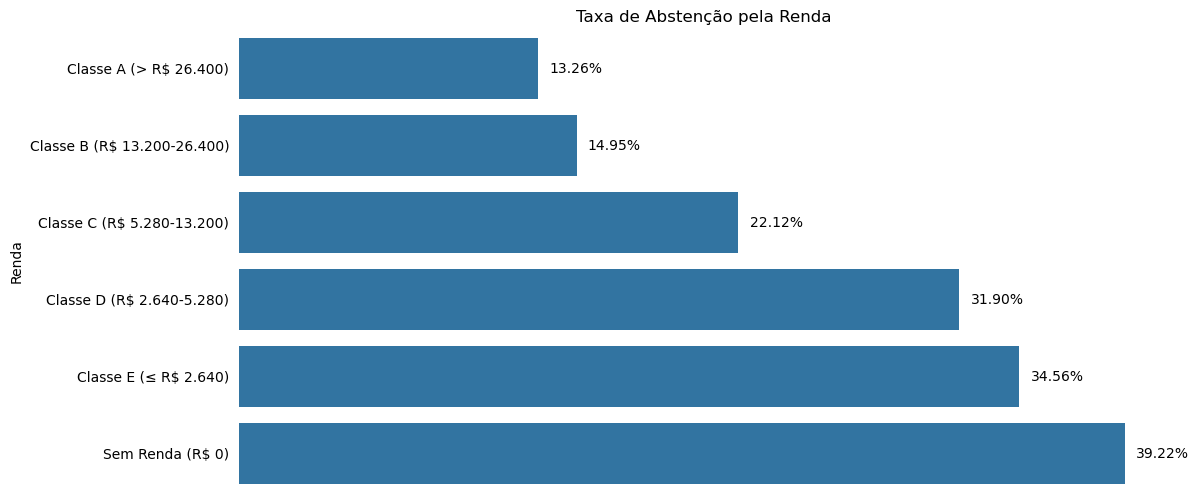

In [ ]:
# Por renda
plot_taxa_abstencao(df_abstencao, 'RENDA', titulo='Taxa de Abstenção pela Renda')

 Podemos observar claramente que com o aumento da renda há uma diminuição da porcentagem de abstenção de candidatos: quanto maior a renda, menor a abstenção

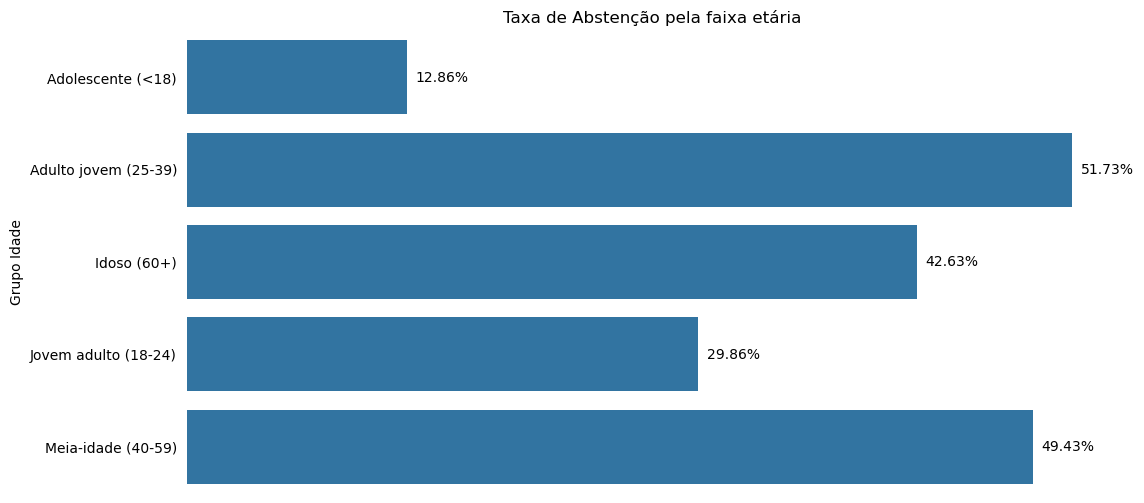

In [ ]:
# Por idade
plot_taxa_abstencao(df_abstencao, 'GRUPO_IDADE', titulo='Taxa de Abstenção pela faixa etária')

 Pessoas com menos de 18 anos e entre 18 e 24 anos apresentam as menores taxas de abstenção, o que é esperado, já que nessa faixa etária muitos estão em busca de ingressar na faculdade por meio do Enem.

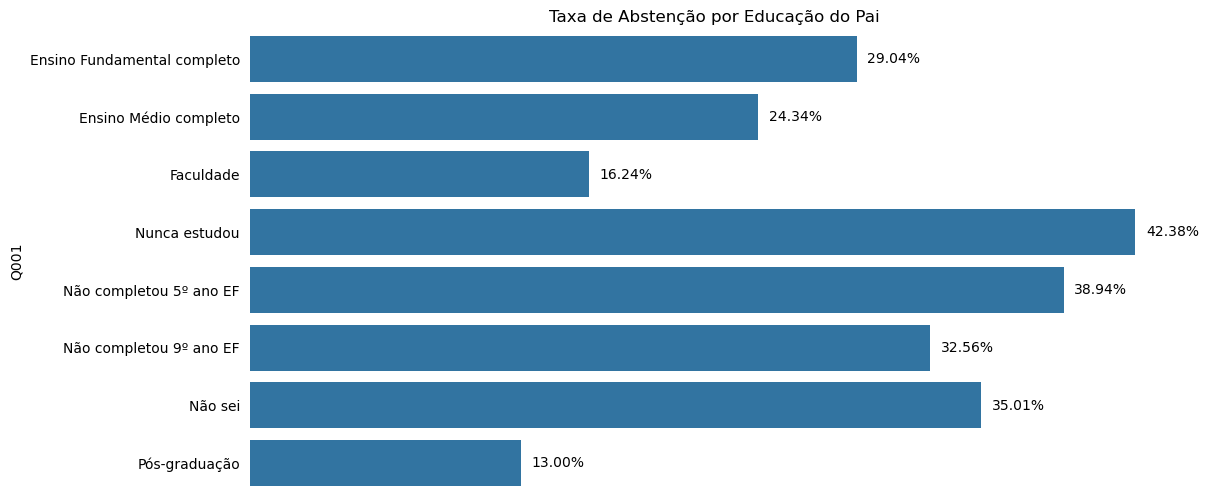

In [ ]:
plot_taxa_abstencao(df_abstencao,'Q001',titulo='Taxa de Abstenção por Educação do Pai')

 Comportamento similar ao da renda: quanto maior o grau de escolaridade do pai, menor a porcentagem de abstenção, chegando a 24% para pais que completaram o ensino médio e 42% para pais que não estudaram.

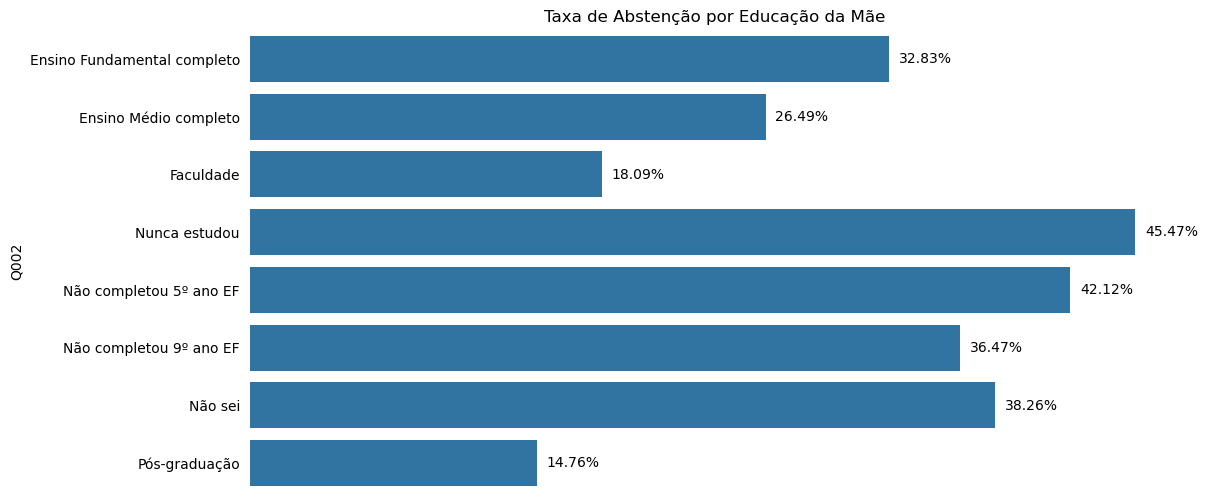

In [ ]:
plot_taxa_abstencao(df_abstencao,'Q002',titulo='Taxa de Abstenção por Educação da Mãe')

 O mesmo padrão se repete para a escolaridade da mãe: quanto maior o nível de escolaridade, menor a porcentagem de abstenção.

 Análise descritiva - correlações observadas não implicam causalidade. Testes de significância estatística são recomendados para confirmação.

In [ ]:
# Validação Estatística: Teste qui-quadrado para renda vs. abstenção
# Para confirmar se as diferenças observadas são estatisticamente significativas,
# aplicamos o teste qui-quadrado de independência entre as variáveis categóricas renda e grupo (abstenção/presença)
from scipy.stats import chi2_contingency
# Criando tabela de contingência
tabela_contingencia = pd.crosstab(df_abstencao['RENDA'].dropna(), df_abstencao['GRUPO'].dropna())
chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)

print(f"Teste Qui-quadrado: Renda vs. Abstenção")
print(f"Estatística qui-quadrado: {chi2:.2f}")
print(f"p-valor: {p_valor:.2e}")
print(f"Associação estatisticamente significativa: {'Sim' if p_valor < 0.05 else 'Não'}")
print(f"\nConclusão: O teste qui-quadrado confirma que existe diferença estatística significativa")
print(f"entre as taxas de abstenção das diferentes classes de renda (p < 0.001).")

Teste Qui-quadrado: Renda vs. Abstenção
Estatística qui-quadrado: 101346.55
p-valor: 0.00e+00
Associação estatisticamente significativa: Sim

Conclusão: O teste qui-quadrado confirma que existe diferença estatística significativa
entre as taxas de abstenção das diferentes classes de renda (p < 0.001).


# 4.0 Criação da Variável Target
 Criação da variável alvo, que será a nota do ENEM, calculada como a média das notas de cada área do conhecimento e da redação.

 Vale ressaltar que a nota do ENEM é calculada com base na Teoria de Resposta ao Item (TRI), que considera a dificuldade das questões e a coerência das respostas do candidato.

 Além disso, para cada curso existem pesos diferentes para cada área do conhecimento.

 No nosso problema, usaremos a média simples das notas de cada área do conhecimento e da redação, já que não conseguimos calcular o TRI nem os pesos de cada curso.

 Criamos assim uma variável proxy - uma variável substituta usada quando a variável real que se deseja medir não está disponível ou não pode ser medida diretamente.

In [ ]:
#Criação da variavel Target
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df_enem_raw['NOTA_ENEM'] = df_enem_raw[colunas_notas].mean(axis=1, skipna=False)
print(f'Porcentagem de vazios da target {df_enem_raw['NOTA_ENEM'].isnull().mean():2%}')
print(df_enem_raw[df_enem_raw['NOTA_ENEM'].isnull()].shape[0])

Porcentagem de vazios da target 31.919303%
1255691


In [ ]:
#Exclusão das linhas nulas na variavel target (vem de pessoas que faltaram/foram eliminadas ou ambos)
indices_nulos=df_enem_raw[df_enem_raw['NOTA_ENEM'].isnull()].index
df_enem_raw=df_enem_raw.drop(indices_nulos)
df_enem_raw.shape

(2678264, 51)

In [ ]:
df_enem_raw.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'NO_MUNICIPIO_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025', 'NOTA_ENEM'],
      dtype='object')

 Exclusão dos valores vazios da variavel target (não faz sentido ter valores vazios na variavel target).
 Vamos também realizar uma limpeza de variaveis que estão relacionadas diretamente com a target.

In [ ]:
colunas_target_relacionadas=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','TP_STATUS_REDACAO',
       'NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT','NO_MUNICIPIO_PROVA']
df_enem_processado=df_enem_raw.drop(columns=colunas_target_relacionadas,axis=1)
print(df_enem_processado.columns)
print(df_enem_processado.shape)
df_enem_processado.head()

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'SG_UF_PROVA',
       'TP_LINGUA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007',
       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016',
       'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'NOTA_ENEM'],
      dtype='object')
(2678264, 35)


,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ESCOLA,IN_TREINEIRO,SG_UF_PROVA,TP_LINGUA,Q001,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_ENEM
2,6,F,1,1,1,1,0,RS,1,H,...,A,A,B,A,A,A,A,A,B,507.94
3,2,F,1,3,2,2,0,CE,0,D,...,A,A,B,A,A,D,A,A,B,564.28
4,3,F,1,3,2,2,0,CE,0,B,...,A,A,B,A,A,B,A,A,A,425.38
9,11,M,1,1,1,1,0,SP,0,H,...,A,B,C,B,A,C,A,B,B,617.12
10,8,M,1,3,1,1,0,RN,0,F,...,A,B,B,A,A,E,A,B,B,697.66


 Agora vamos dividir os dados entre treino/teste.
 Salvando os modelos que vão ser usados na modelagem.

In [ ]:
X = df_enem_processado.drop('NOTA_ENEM', axis=1)
y = df_enem_processado['NOTA_ENEM']
# Dividindo em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimensões do Treino:", X_train.shape)
print("Dimensões do Teste:", X_test.shape)

# Esses dados vão ser usados na modelagem.
joblib.dump(X_train, 'data/X_train.pkl')
joblib.dump(X_test, 'data/X_test.pkl')
joblib.dump(y_train, 'data/y_train.pkl')
joblib.dump(y_test, 'data/y_test.pkl')

Dimensões do Treino: (2142611, 34)
Dimensões do Teste: (535653, 34)


['data/y_test.pkl']

# 5. Análise Exploratória dos Dados (EDA)
 Como estamos trabalhando com os dados do ENEM 2023 consideramos apenas os candidatos com valores válidos da variável target (NOTA_ENEM).

 Essa etapa é o foco principal, pois permite entender como as notas se comportam em relação às diferentes características dos candidatos.

In [ ]:
df_analise_exploratoria=X_train.copy()

In [ ]:
df_analise_exploratoria.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'SG_UF_PROVA',
       'TP_LINGUA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007',
       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016',
       'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'],
      dtype='object')

# 5.1 Análise Univariada

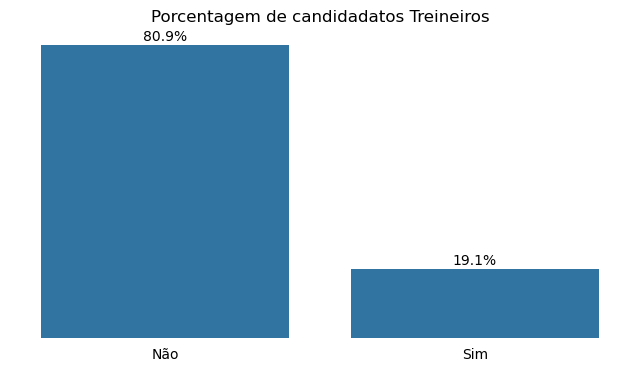

In [ ]:
df_analise_exploratoria['IN_TREINEIRO']=df_analise_exploratoria['IN_TREINEIRO'].map(treineiro_map)
barplot(df_analise_exploratoria,'IN_TREINEIRO','Porcentagem de candidadatos Treineiros')

 19% dos candidatos estão realizando a prova como treino.

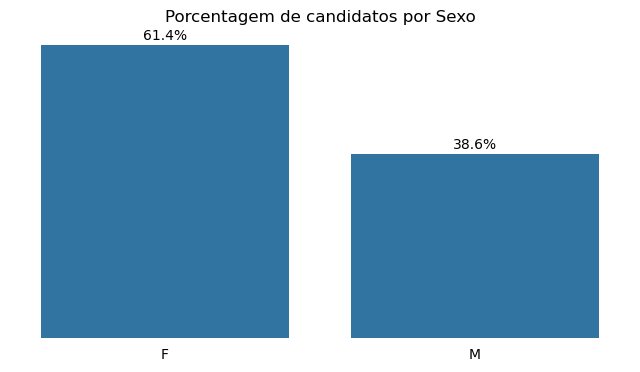

In [ ]:
barplot(df_analise_exploratoria,'TP_SEXO','Porcentagem de candidatos por Sexo')

 Maior porcentagem de pessoas do sexo Feminino

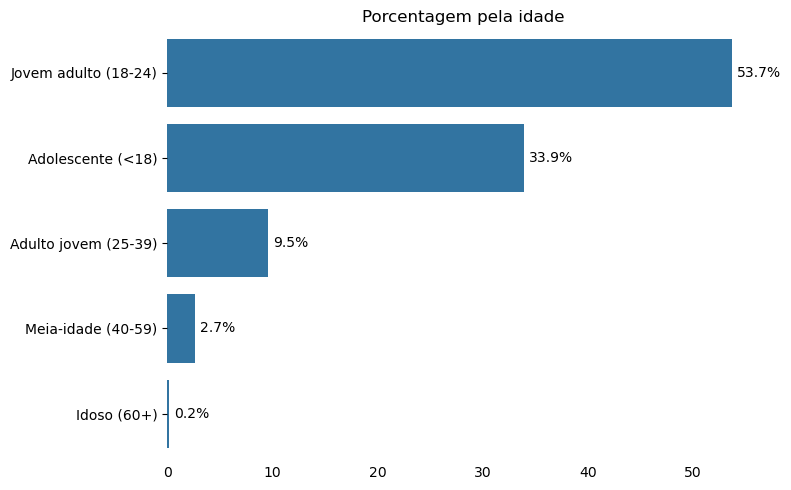

In [ ]:
df_analise_exploratoria['TP_FAIXA_ETARIA']=df_analise_exploratoria['TP_FAIXA_ETARIA'].map(mapa_grupos_idade)
barplot_horizontal(df_analise_exploratoria,'TP_FAIXA_ETARIA','Porcentagem pela idade')

 87% dos candidatos do ano de 2023 são adolescentes (<18) e jovem adulto (18-24), 0,2% são pessoas idosas.

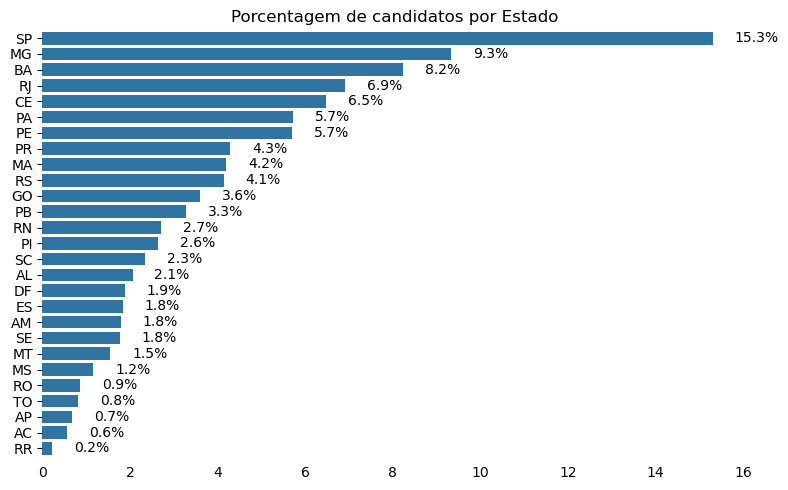

In [ ]:
barplot_horizontal(df_analise_exploratoria,'SG_UF_PROVA','Porcentagem de candidatos por Estado')

 O estado de São Paulo lidera a quantidade de candidatos, seguido de Minas Gerais e Bahia.

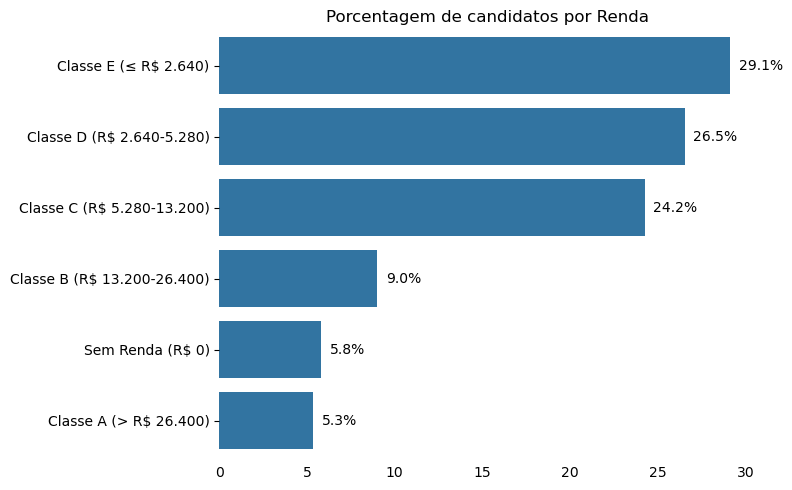

In [ ]:
df_analise_exploratoria['Q006']=df_analise_exploratoria['Q006'].map(renda_abep)
barplot_horizontal(df_analise_exploratoria,'Q006','Porcentagem de candidatos por Renda')

 Classe E  e Classe D juntas representam mais da metade dos inscritos.

# 5.2 Análise Bivariada
 Relação entre variáveis socioeconômicas e desempenho no ENEM

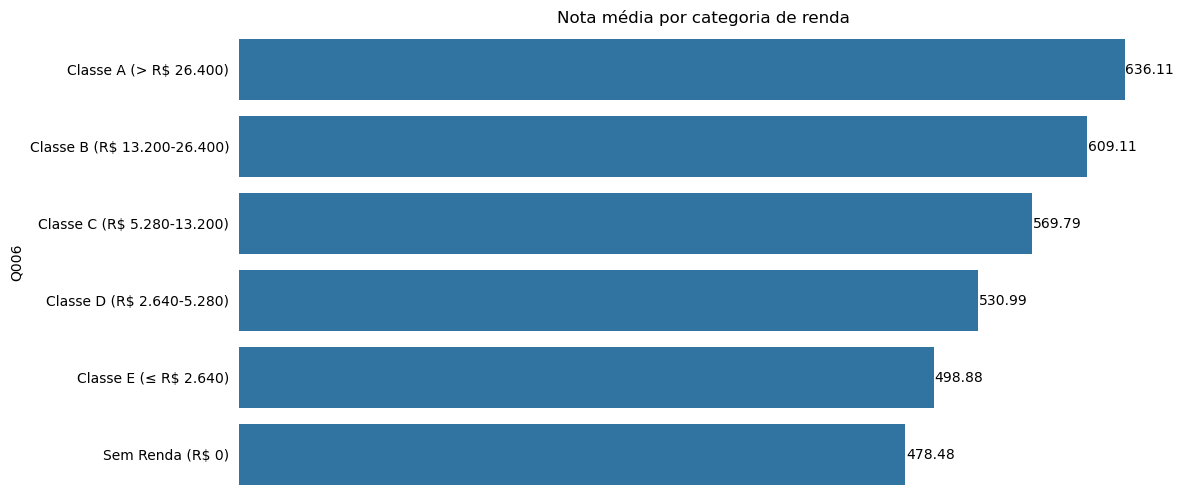

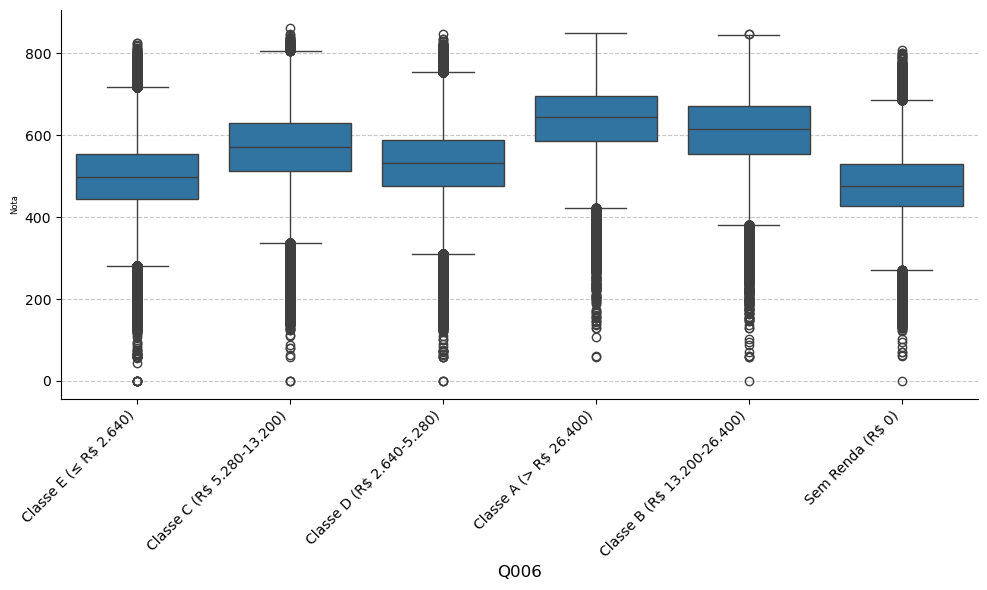

In [ ]:
plot_media_nota(df_analise_exploratoria, 'Q006', y_train, titulo='Nota média por categoria de renda')
plot_boxplot_nota(df_analise_exploratoria,'Q006',y_train)

 As médias confirmam melhor desempenho nas classes de maior renda. Contudo, a alta variabilidade observada nos boxplots mostra que o desempenho individual pode variar consideravelmente dentro de cada faixa socioeconômica.

 Teste ANOVA para validar diferenças de nota entre classes de renda

In [ ]:
from scipy.stats import f_oneway

# Separando notas por classe de renda
grupos_renda = []
for classe in df_analise_exploratoria['Q006'].dropna().unique():
    notas_classe = y_train[df_analise_exploratoria['Q006'] == classe].dropna()
    grupos_renda.append(notas_classe)

# ANOVA one-way
f_stat, p_valor_anova = f_oneway(*grupos_renda)

print(f"Teste ANOVA: Renda vs. Nota ENEM")
print(f"Estatística F: {f_stat:.2f}")
print(f"p-valor: {p_valor_anova:.2e}")
print(f"Diferenças estatisticamente significativas entre grupos: {'Sim' if p_valor_anova < 0.05 else 'Não'}")
print(f"diferenças observadas refletem padrões reais nos dados, não apenas nas médias.")

Teste ANOVA: Renda vs. Nota ENEM
Estatística F: 111312.12
p-valor: 0.00e+00
Diferenças estatisticamente significativas entre grupos: Sim
diferenças observadas refletem padrões reais nos dados, não apenas nas médias.


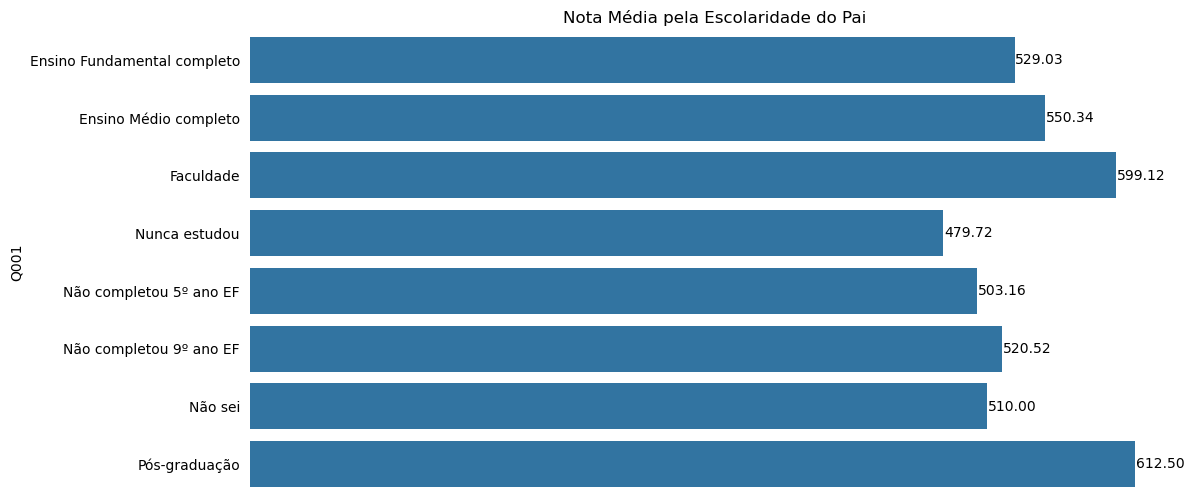

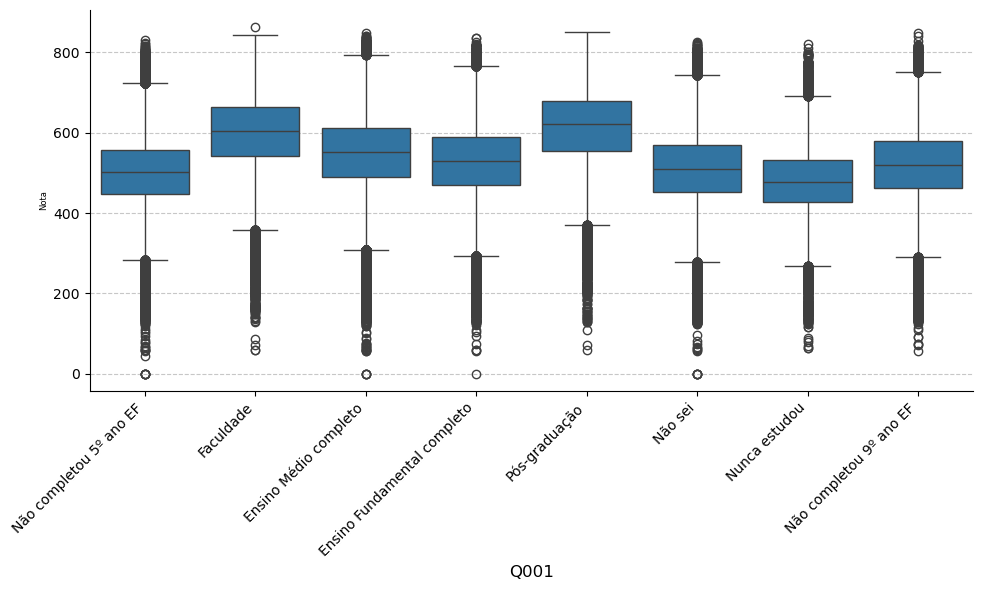

In [ ]:
df_analise_exploratoria['Q001']=df_analise_exploratoria['Q001'].map(escolaridade_map)
plot_media_nota(df_analise_exploratoria,'Q001',y_train,titulo='Nota Média pela Escolaridade do Pai')
plot_boxplot_nota(df_analise_exploratoria,'Q001',y_train)

 As notas médias crescem conforme a escolaridade paterna: de 479,72 (nunca estudou) até 612,50 (pós-graduação). Apesar da tendência clara, a alta variabilidade observada nos boxplots mostra ampla distribuição de desempenho em todos os níveis educacionais.

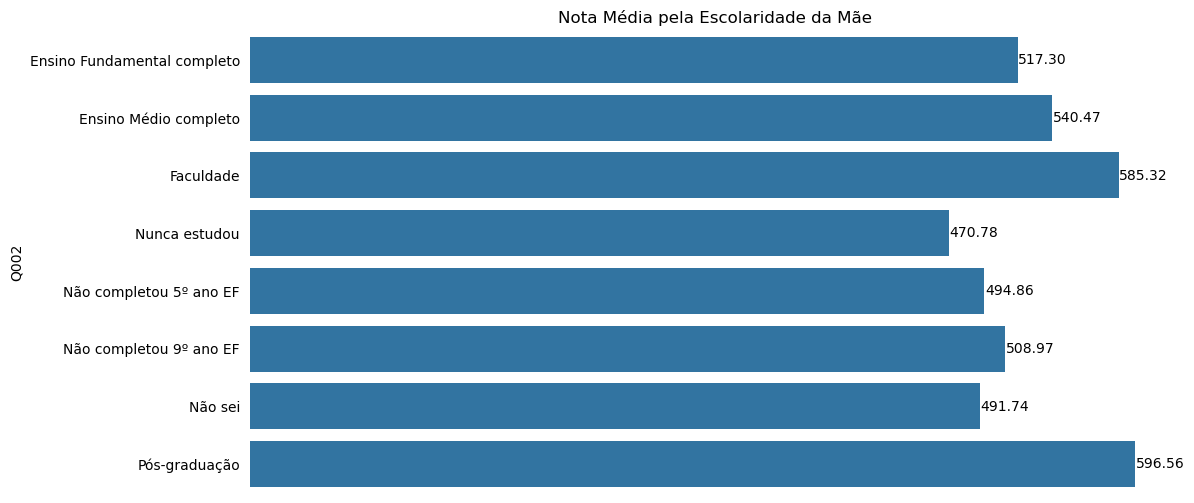

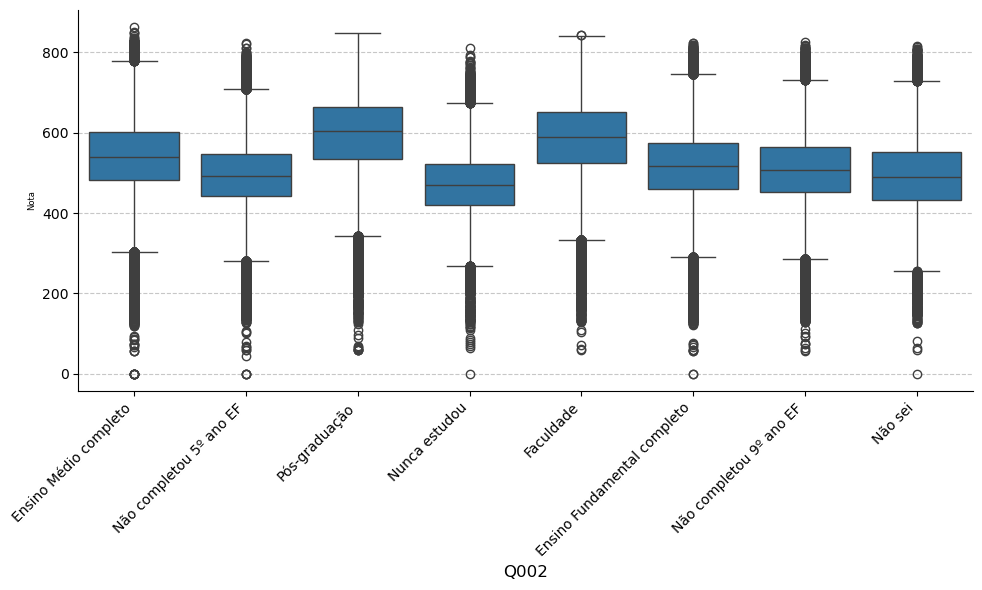

In [ ]:
df_analise_exploratoria['Q002']=df_analise_exploratoria['Q002'].map(escolaridade_map)
plot_media_nota(df_analise_exploratoria,'Q002',y_train,titulo='Nota Média pela Escolaridade da Mãe')
plot_boxplot_nota(df_analise_exploratoria,'Q002',y_train)

 O mesmo padrão da escolaridade do pai se repete para a escolaridade da mãe.

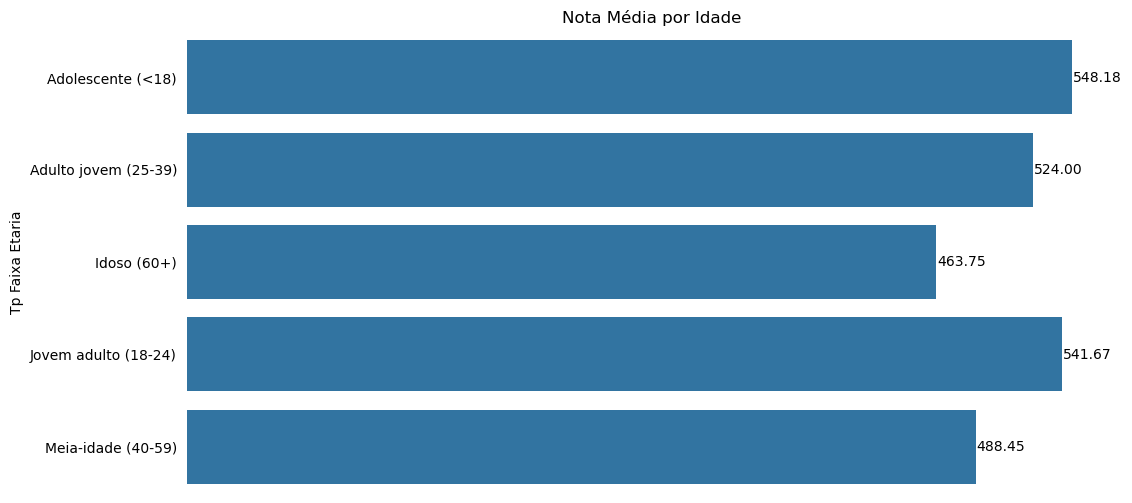

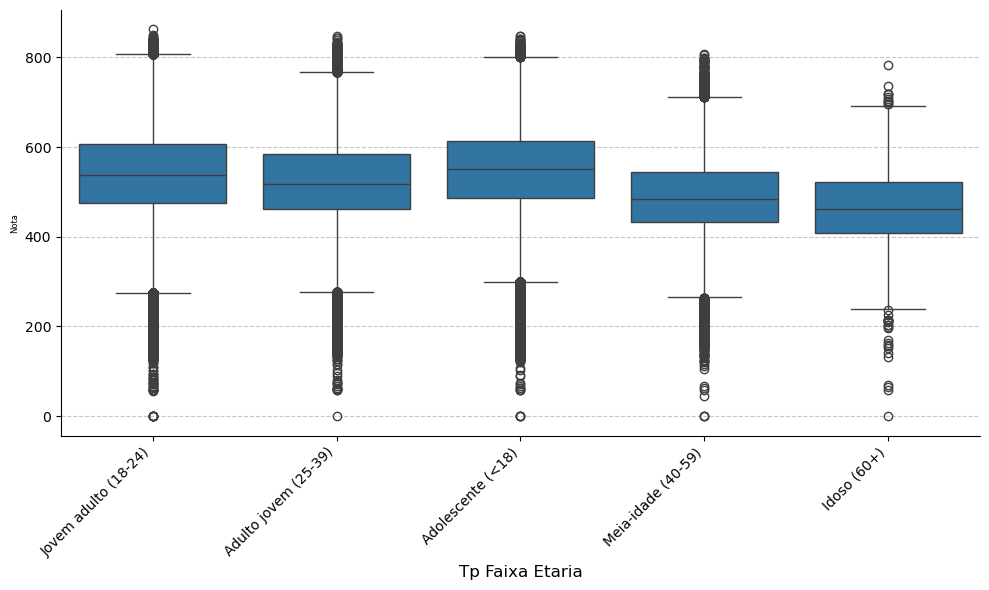

In [ ]:
plot_media_nota(df_analise_exploratoria,'TP_FAIXA_ETARIA',y_train,titulo='Nota Média por Idade')
plot_boxplot_nota(df_analise_exploratoria,'TP_FAIXA_ETARIA',y_train)

 O desempenho mantém-se estável até a faixa 'Adulto Jovem' (548,18 a 524,00 pontos), declinando a partir da 'Meia-idade' (488,45) até 'Idosos' (463,75). Os boxplots mostram presença de outliers em todas as faixas etárias.

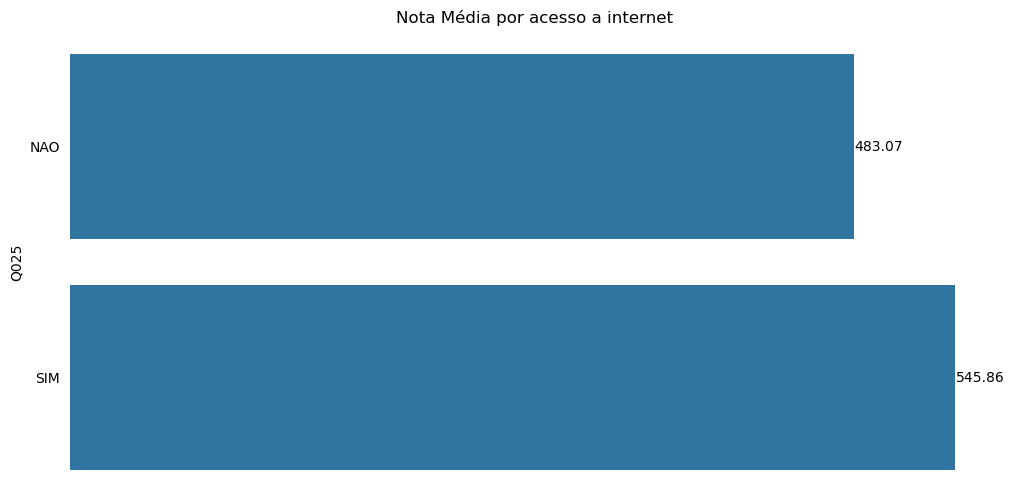

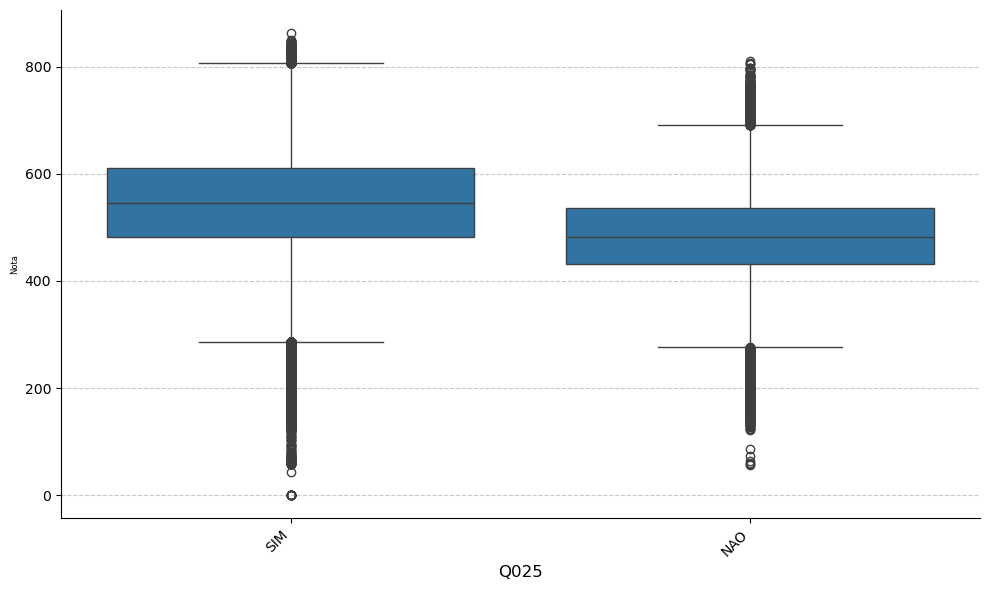

In [ ]:
df_analise_exploratoria['Q025']=df_analise_exploratoria['Q025'].map(Q025_map)
plot_media_nota(df_analise_exploratoria,'Q025',y_train,titulo='Nota Média por acesso a internet')
plot_boxplot_nota(df_analise_exploratoria,'Q025',y_train)

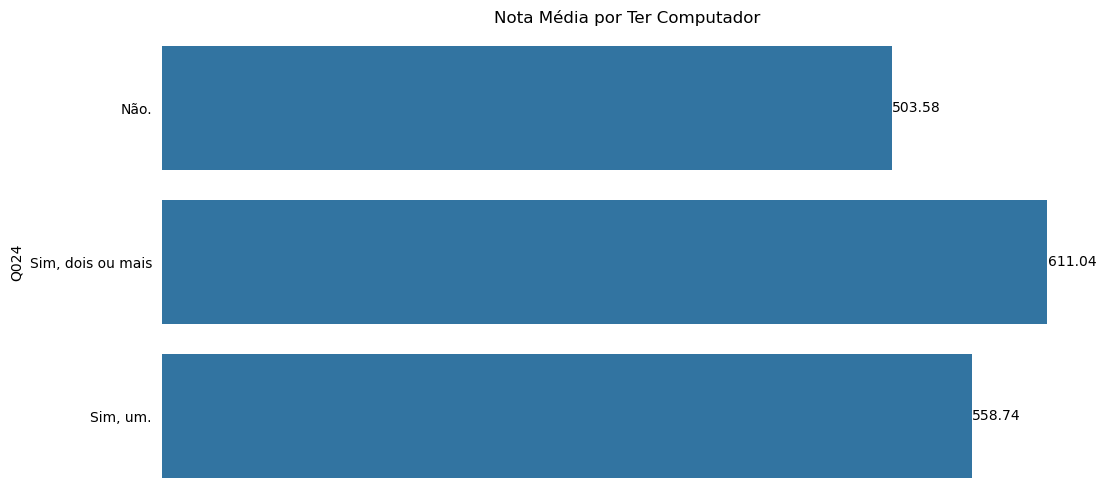

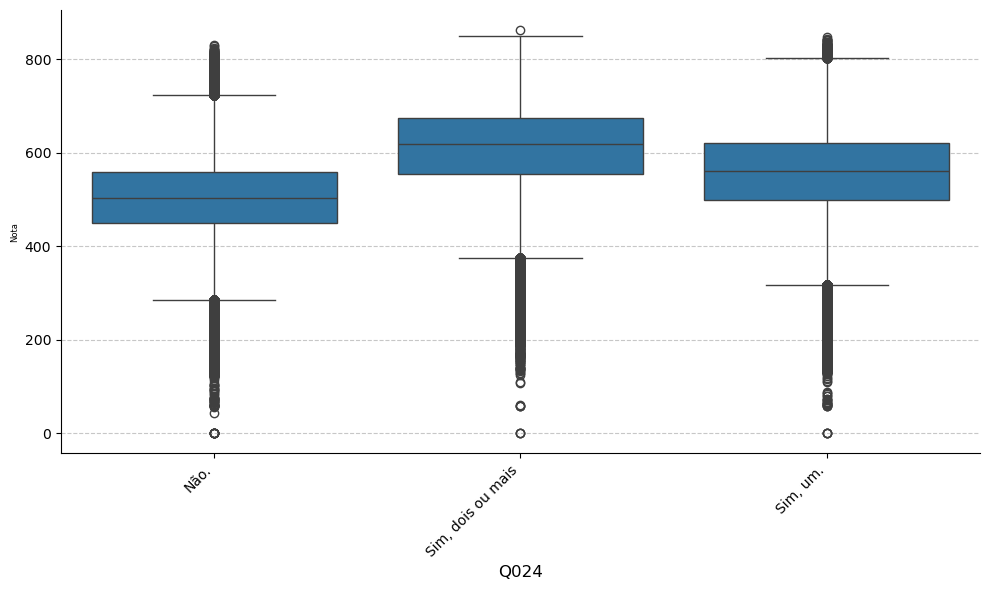

In [ ]:
df_analise_exploratoria['Q024']=df_analise_exploratoria['Q024'].map(Q024_map)
plot_media_nota(df_analise_exploratoria,'Q024',y_train,titulo='Nota Média por Ter Computador')
plot_boxplot_nota(df_analise_exploratoria,'Q024',y_train)

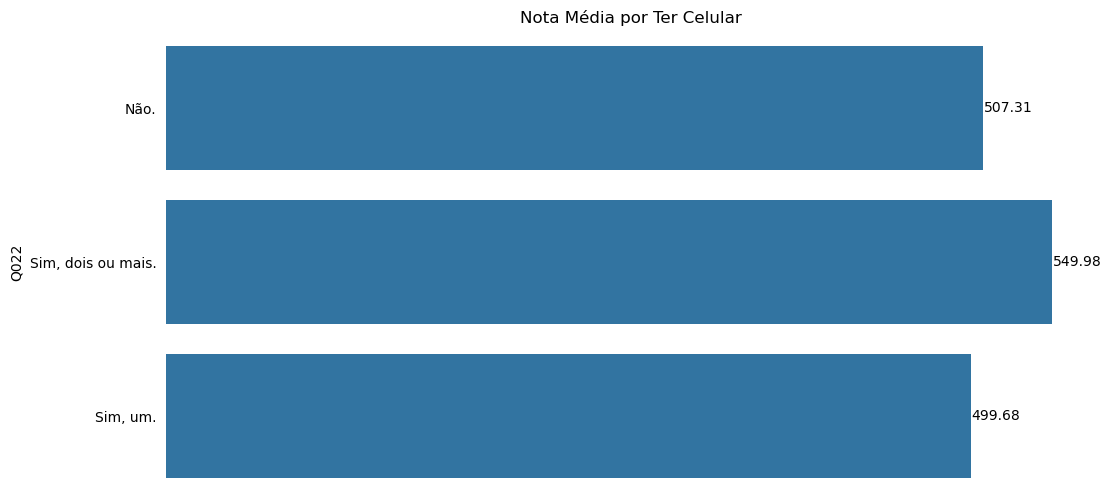

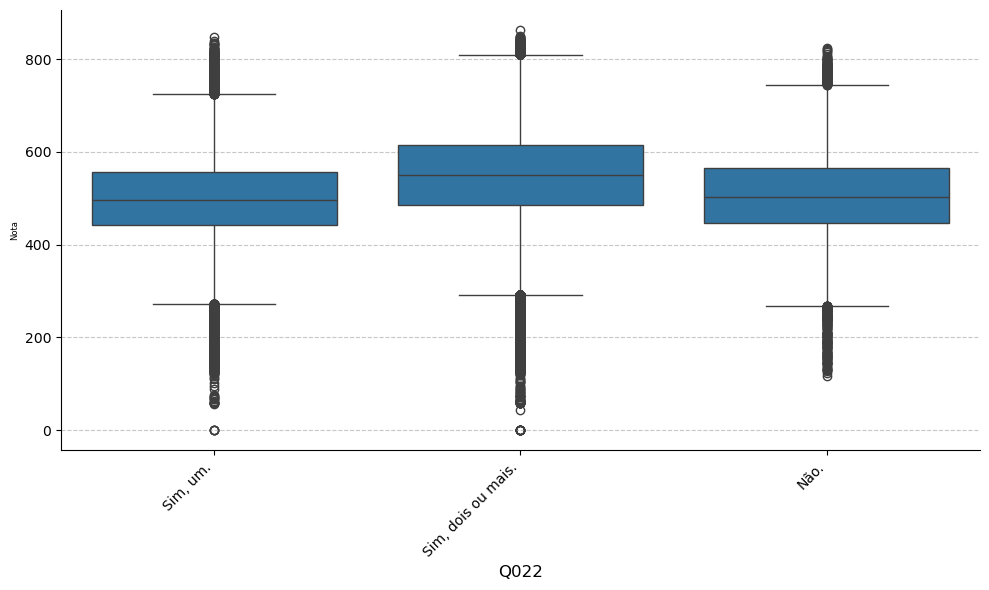

In [ ]:
df_analise_exploratoria['Q022']=df_analise_exploratoria['Q022'].map(Q022_map)
plot_media_nota(df_analise_exploratoria,'Q022',y_train,titulo='Nota Média por Ter Celular')
plot_boxplot_nota(df_analise_exploratoria,'Q022',y_train)

 O acesso à internet está associado a diferença de 62,79 pontos na nota média entre quem tem (545,86) e quem não tem acesso (483,07). Similarmente, ter computador está associado a diferença de 107,46 pontos (611,04 vs 503,58).

 Em contraste, a posse de celular apresenta menor diferença: 32,67 pontos (549,98 vs 507,31). Os boxplots evidenciam presença de outliers em todas as categorias, indicando alta variabilidade no desempenho independentemente do acesso a essas tecnologias.

# 5.3 Limitações Metodológicas
 Os boxplots revelam alta variabilidade e muitos outliers em todas as categorias, o que pode mascarar diferenças estatisticamente significativas.

 Análise baseada em médias não considera a distribuição completa dos dados.
 Diferenças observadas carecem de validação através de testes formais (ANOVA, Kruskal-Wallis)

 Esta análise exploratória cumpre seu objetivo de identificar tendências gerais e estabelecer base para futuras análises confirmatórias com métodos estatísticos apropriados.

# 5.4 Principais Descobertas

 Quando consideramos valores médios de Nota para cada classe das categorias, observamos uma relação positiva consistente entre as variáveis socioeconômicas e o desempenho: quanto melhores os indicadores (como renda familiar, nível educacional dos pais, entre outros), maior a nota média no ENEM.

 Contudo, ao analisar os boxplots, verifica-se uma grande quantidade de valores discrepantes e alta variabilidade dos dados em todas as categorias.

 Isso demonstra que, apesar das tendências observadas nos valores médios, existe considerável dispersão no desempenho individual dentro de cada grupo socioeconômico.

 Tecnologia e notas médias: O acesso à internet está associado a diferença de 62,79 pontos na nota média entre quem tem (545,86) e quem não tem acesso (483,07). Similarmente, ter computador está associado a diferença de 107,46 pontos (611,04 vs 503,58).

 Em contraste, a posse de celular apresenta menor diferença: 32,67 pontos (549,98 vs 507,31). Os boxplots evidenciam presença de outliers em todas as categorias, indicando alta variabilidade no desempenho independentemente do acesso a essas tecnologias.

 Observação: Como se trata de uma análise meramente descritiva, não foram realizados testes estatísticos para comprovar se as médias de cada categoria são estatisticamente diferentes entre si, apenas em algumas categorias como renda.


# 6. Proximos Passos:
 Com isso finalizamos a análise exploratória e preparação dos dados para o ENEM 2023. O próximo passo será a modelagem preditiva, onde utilizaremos os dados preparados para construir modelos que possam prever a nota do ENEM com base nas características dos candidatos.

 Os dados que serão usados estão no formato .pkl e estão na pasta 'data'.

In [ ]:
df_enem_processado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2678264 entries, 2 to 3933953
Data columns (total 35 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_FAIXA_ETARIA  int64  
 1   TP_SEXO          object 
 2   TP_ESTADO_CIVIL  int64  
 3   TP_COR_RACA      int64  
 4   TP_ST_CONCLUSAO  int64  
 5   TP_ESCOLA        int64  
 6   IN_TREINEIRO     int64  
 7   SG_UF_PROVA      object 
 8   TP_LINGUA        int64  
 9   Q001             object 
 10  Q002             object 
 11  Q003             object 
 12  Q004             object 
 13  Q005             int64  
 14  Q006             object 
 15  Q007             object 
 16  Q008             object 
 17  Q009             object 
 18  Q010             object 
 19  Q011             object 
 20  Q012             object 
 21  Q013             object 
 22  Q014             object 
 23  Q015             object 
 24  Q016             object 
 25  Q017             object 
 26  Q018             object 
 27  Q019             

# Finalizamos com um dataset com 2.6 milhões de registros e 35 colunas, com 735 MB de uso.